In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Win10\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import mysql.connector
import json
import pandas as pd
import datetime


mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Kaja25802580",
  database="twitter_database"
)

mycursor = mydb.cursor()


In [3]:
df_tweets = pd.read_sql("select id, tweet_text, author_id, place_id, like_count, reply_count, retweet_count, created_at  from tweets where like_count > 100", mydb)

## Getting Tweets With Keyword

In [4]:
lower_tweets = []
for tweet in df_tweets["tweet_text"]:
    lower_tweets.append(tweet.lower())
lower_tweets = pd.DataFrame(lower_tweets)
lower_tweets

,0
0,exclusive: drugmakers from pfizer to gsk to hi...
1,top gainer of 2019\n\n1. aavas fin +131%\n2....
2,"woah. “in december, estonian police and border..."
3,pfizer &amp; gsk (who both advertise on fox ne...
4,our taxpayer dollars are funding these pharmac...
...,...
11649,dj fantan encourages ghetto youths to get the ...
11650,"the thing that's fucking with me, in working o..."
11651,germany and france pay the price for their ast...
11652,@thatryanchap @fact_covid not only media but i...


In [5]:
# keyword = 'pfizer' or 'Pfizer' or 'pfizer vaccine' or 'Pfizer vaccine'
def keywords_func(keyword):
    list_of_keyword_tweets = []
    for tweet in lower_tweets[0]:
        if keyword in tweet:
            list_of_keyword_tweets.append(tweet)
    df_keywords = pd.DataFrame(list_of_keyword_tweets)
    return df_keywords




In [6]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in keywords_func('pfizer')[0]: 
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(df_tweets['tweet_text']))
negative = percentage(negative, len(df_tweets['tweet_text']))
neutral = percentage(neutral, len(df_tweets['tweet_text']))
polarity = percentage(polarity, len(df_tweets['tweet_text']))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [7]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1321
positive number:  713
negative number:  307
neutral number:  301


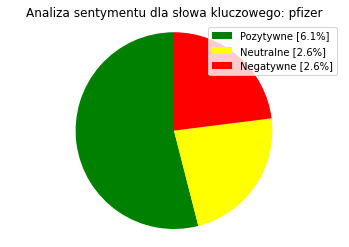

In [8]:
#Creating PieCart
labels = ['Pozytywne ['+str(positive)+'%]' , 'Neutralne ['+str(neutral)+'%]','Negatywne ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'yellow','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title(f"Analiza sentymentu dla słowa kluczowego: pfizer")
plt.axis('equal')
plt.savefig('charts/pfizer_sentiment.png')
plt.show()

## Curevac

In [9]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in keywords_func('curevac')[0]: 
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(df_tweets['tweet_text']))
negative = percentage(negative, len(df_tweets['tweet_text']))
neutral = percentage(neutral, len(df_tweets['tweet_text']))
polarity = percentage(polarity, len(df_tweets['tweet_text']))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [10]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  79
positive number:  48
negative number:  14
neutral number:  17


<ipython-input-11-5ada210fb90d>:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  patches, texts = plt.pie(sizes,colors=colors, startangle=90)


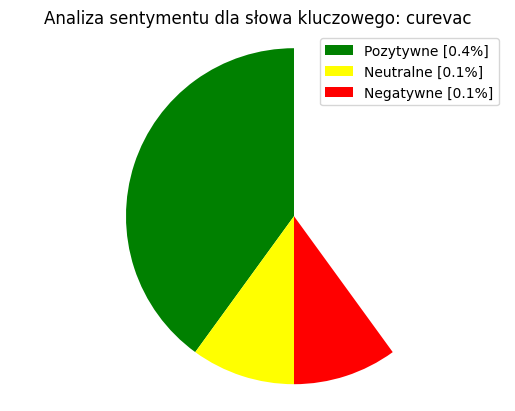

In [11]:
#Creating PieCart
labels = ['Pozytywne ['+str(positive)+'%]' , 'Neutralne ['+str(neutral)+'%]','Negatywne ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'yellow','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title(f"Analiza sentymentu dla słowa kluczowego: curevac")
plt.axis('equal')
plt.savefig('charts/curevac_sentiment.png')
plt.show()

## Moderna

In [12]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in keywords_func('moderna')[0]: 
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(df_tweets['tweet_text']))
negative = percentage(negative, len(df_tweets['tweet_text']))
neutral = percentage(neutral, len(df_tweets['tweet_text']))
polarity = percentage(polarity, len(df_tweets['tweet_text']))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [13]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  743
positive number:  397
negative number:  145
neutral number:  201


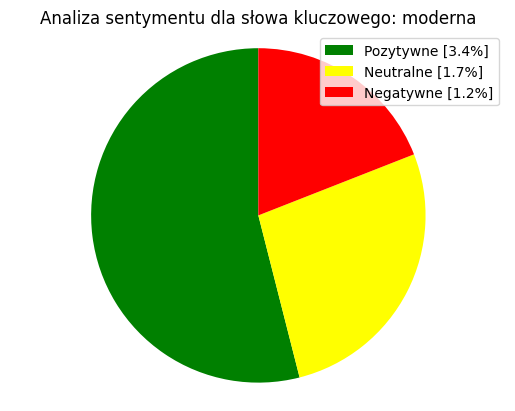

In [14]:
#Creating PieCart
labels = ['Pozytywne ['+str(positive)+'%]' , 'Neutralne ['+str(neutral)+'%]','Negatywne ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'yellow','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title(f"Analiza sentymentu dla słowa kluczowego: moderna")
plt.axis('equal')
plt.savefig('charts/moderna_sentiment.png')
plt.show()

## Sputnik

In [15]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in keywords_func('sputnik')[0]: 
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(df_tweets['tweet_text']))
negative = percentage(negative, len(df_tweets['tweet_text']))
neutral = percentage(neutral, len(df_tweets['tweet_text']))
polarity = percentage(polarity, len(df_tweets['tweet_text']))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [16]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  431
positive number:  175
negative number:  147
neutral number:  109


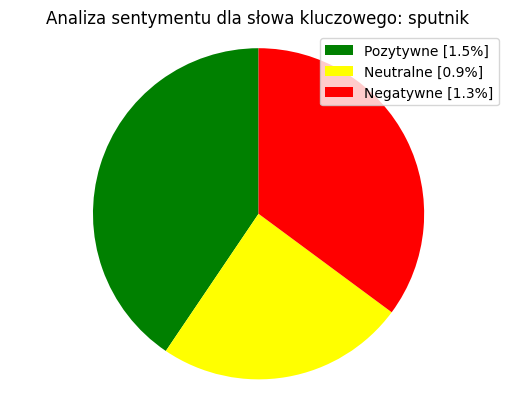

In [17]:
#Creating PieCart
labels = ['Pozytywne ['+str(positive)+'%]' , 'Neutralne ['+str(neutral)+'%]','Negatywne ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'yellow','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title(f"Analiza sentymentu dla słowa kluczowego: sputnik")
plt.axis('equal')
plt.savefig('charts/sputnik_sentiment.png')
plt.show()

## Johnosn & Johnson

In [18]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in keywords_func('johnson')[0]: 
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(df_tweets['tweet_text']))
negative = percentage(negative, len(df_tweets['tweet_text']))
neutral = percentage(neutral, len(df_tweets['tweet_text']))
polarity = percentage(polarity, len(df_tweets['tweet_text']))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [19]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  363
positive number:  147
negative number:  109
neutral number:  107


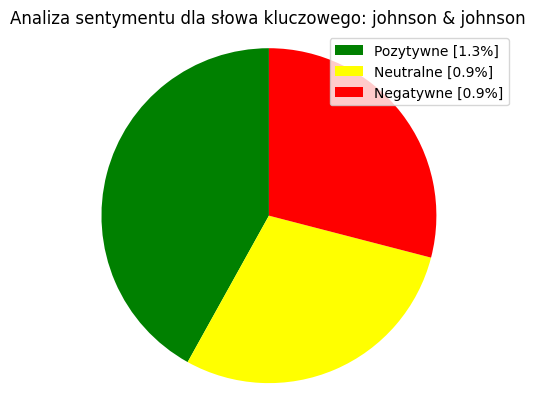

In [20]:
#Creating PieCart
labels = ['Pozytywne ['+str(positive)+'%]' , 'Neutralne ['+str(neutral)+'%]','Negatywne ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['green', 'yellow','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title(f"Analiza sentymentu dla słowa kluczowego: johnson & johnson")
plt.axis('equal')
plt.savefig('charts/johnson_sentiment.png')
plt.show()

## Cleaning Tweets to Analyse Sentiment

In [21]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in df_tweets["tweet_text"]: 
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, len(df_tweets['tweet_text']))
negative = percentage(negative, len(df_tweets['tweet_text']))
neutral = percentage(neutral, len(df_tweets['tweet_text']))
polarity = percentage(polarity, len(df_tweets['tweet_text']))
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [22]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  11654
positive number:  5613
negative number:  3362
neutral number:  2679


In [23]:
tweet_list.drop_duplicates(inplace = True)

In [24]:
tweet_list

,0
0,Exclusive: Drugmakers from Pfizer to GSK to hi...
1,Top Gainer of 2019\n\n1. Aavas Fin +131%\n2....
2,"Woah. “In December, Estonian police and border..."
3,Pfizer &amp; GSK (who both advertise on Fox Ne...
4,Our taxpayer dollars are funding these pharmac...
...,...
11649,DJ Fantan encourages Ghetto Youths to get the ...
11650,"The thing that's fucking with me, in working o..."
11651,Germany and France pay the price for their Ast...
11652,@ThatRyanChap @fact_covid Not only media but I...


In [25]:
#Calculating Negative, Positive, Neutral and Compound values
tweet_list[['polarity', 'subjectivity']] = tweet_list[0].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list[0].iteritems():
   score = SentimentIntensityAnalyzer().polarity_scores(row)
   neg = score['neg']
   neu = score['neu']
   pos = score['pos']
   comp = score['compound']
   if neg > pos:
      tweet_list.loc[index, 'sentiment'] = 'negative'
   elif pos > neg:
      tweet_list.loc[index, 'sentiment'] = 'positive'
   else:
      tweet_list.loc[index, 'sentiment'] = 'neutral'
      tweet_list.loc[index, 'neg'] = neg
      tweet_list.loc[index, 'neu'] = neu
      tweet_list.loc[index, 'pos'] = pos
      tweet_list.loc[index, 'compound'] = comp
tweet_list.head(10)

,0,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Exclusive: Drugmakers from Pfizer to GSK to hi...,0.0000,0.0000,positive,NaN,NaN,NaN,NaN
1,Top Gainer of 2019\n\n1. Aavas Fin +131%\n2....,0.5000,0.5000,positive,NaN,NaN,NaN,NaN
2,"Woah. “In December, Estonian police and border...",-0.0625,0.1875,negative,NaN,NaN,NaN,NaN
3,Pfizer &amp; GSK (who both advertise on Fox Ne...,0.5750,0.6750,positive,NaN,NaN,NaN,NaN
4,Our taxpayer dollars are funding these pharmac...,0.0000,0.0000,positive,NaN,NaN,NaN,NaN
5,Sputnik to close its operations in Estonia aft...,0.0500,0.2500,negative,NaN,NaN,NaN,NaN
6,@sputnik_TR İvit! https://t.co/GCOuqmowW6 http...,0.0000,0.0000,neutral,0.0,1.0,0.0,0.0
7,NEWS: Drug companies hike prices of 250 prescr...,0.1875,0.4375,negative,NaN,NaN,NaN,NaN
8,Project Sputnik keeps a rollin' -- Introducing...,0.0000,0.0000,positive,NaN,NaN,NaN,NaN
9,Project Sputnik keeps a rollin' -- Introducing...,0.0000,0.0000,positive,NaN,NaN,NaN,NaN


In [26]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tweet_list[tweet_list['sentiment']=='negative']
tw_list_positive = tweet_list[tweet_list['sentiment']=='positive']
tw_list_neutral = tweet_list[tweet_list['sentiment']=='neutral']

In [27]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tweet_list,'sentiment')

,Total,Percentage
positive,5601,48.18
negative,3361,28.91
neutral,2664,22.91
